### Imports

In [1]:
%load_ext PWE_NB_Extension

In [2]:
from PW_explorer.load_worlds import load_worlds
from PW_explorer.run_clingo import run_clingo
from PW_explorer.visualize import PWEVisualization
from PW_explorer.helper import pw_slicer, rel_slicer, rel_name_remapper
from PW_explorer.export import PWEExport

In [3]:
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

## Partitions Encoding

We can encode partitions of n (named) objects in Datalog as follows (here n=4):

In [4]:
%%clingo --donot-display_input -exp partitions

obj(1..4).
1 { tog(A,B) ; ntog(A,B) } 1 :- obj(A), obj(B), A!=B.
tog(A,B) :- tog(B,A).
tog(A,B) :- tog(A,C), tog(C,B), A!=B, B!=C, A!=C.

%graphviz graph graph_type=undirected rankdir=TB
%graphviz edge tog(HEAD, TAIL)
%graphviz node obj(N)

Output:


'Answer: 1\nobj(1) obj(2) obj(3) obj(4) ntog(2,1) ntog(3,1) ntog(4,1) ntog(1,2) ntog(3,2) ntog(4,2) ntog(1,3) ntog(2,3) ntog(4,3) ntog(1,4) ntog(2,4) ntog(3,4)\nAnswer: 2\nobj(1) obj(2) obj(3) obj(4) tog(2,1) tog(1,2) ntog(3,1) ntog(4,1) ntog(3,2) ntog(4,2) ntog(1,3) ntog(2,3) ntog(4,3) ntog(1,4) ntog(2,4) ntog(3,4)\nAnswer: 3\nobj(1) obj(2) obj(3) obj(4) tog(4,1) tog(1,4) ntog(2,1) ntog(3,1) ntog(1,2) ntog(3,2) ntog(4,2) ntog(1,3) ntog(2,3) ntog(4,3) ntog(2,4) ntog(3,4)\nAnswer: 4\nobj(1) obj(2) obj(3) obj(4) tog(3,1) tog(1,3) ntog(2,1) ntog(4,1) ntog(1,2) ntog(3,2) ntog(4,2) ntog(2,3) ntog(4,3) ntog(1,4) ntog(2,4) ntog(3,4)\nAnswer: 5\nobj(1) obj(2) obj(3) obj(4) tog(3,2) tog(2,3) ntog(2,1) ntog(3,1) ntog(4,1) ntog(1,2) ntog(4,2) ntog(1,3) ntog(4,3) ntog(1,4) ntog(2,4) ntog(3,4)\nAnswer: 6\nobj(1) obj(2) obj(3) obj(4) tog(4,1) tog(1,4) tog(3,2) tog(2,3) ntog(2,1) ntog(3,1) ntog(1,2) ntog(4,2) ntog(1,3) ntog(4,3) ntog(2,4) ntog(3,4)\nAnswer: 7\nobj(1) obj(2) obj(3) obj(4) tog(3,2) tog(2,3) tog(3,1) tog(1,3) tog(2,1) tog(1,2) ntog(4,1) ntog(4,2) ntog(4,3) ntog(1,4) ntog(2,4) ntog(3,4)\nAnswer: 8\nobj(1) obj(2) obj(3) obj(4) tog(4,2) tog(2,4) ntog(2,1) ntog(3,1) ntog(4,1) ntog(1,2) ntog(3,2) ntog(1,3) ntog(2,3) ntog(4,3) ntog(1,4) ntog(3,4)\nAnswer: 9\nobj(1) obj(2) obj(3) obj(4) tog(4,2) tog(2,4) tog(3,1) tog(1,3) ntog(2,1) ntog(4,1) ntog(1,2) ntog(3,2) ntog(2,3) ntog(4,3) ntog(1,4) ntog(3,4)\nAnswer: 10\nobj(1) obj(2) obj(3) obj(4) tog(4,2) tog(2,4) tog(4,1) tog(1,4) tog(2,1) tog(1,2) ntog(3,1) ntog(3,2) ntog(1,3) ntog(2,3) ntog(4,3) ntog(3,4)\nAnswer: 11\nobj(1) obj(2) obj(3) obj(4) tog(4,3) tog(3,4) ntog(2,1) ntog(3,1) ntog(4,1) ntog(1,2) ntog(3,2) ntog(4,2) ntog(1,3) ntog(2,3) ntog(1,4) ntog(2,4)\nAnswer: 12\nobj(1) obj(2) obj(3) obj(4) tog(4,3) tog(3,4) tog(2,1) tog(1,2) ntog(3,1) ntog(4,1) ntog(3,2) ntog(4,2) ntog(1,3) ntog(2,3) ntog(1,4) ntog(2,4)\nAnswer: 13\nobj(1) obj(2) obj(3) obj(4) tog(4,3) tog(3,4) tog(4,2) tog(2,4) tog(3,2) tog(2,3) ntog(2,1) ntog(3,1) ntog(4,1) ntog(1,2) ntog(1,3) ntog(1,4)\nAnswer: 14\nobj(1) obj(2) obj(3) obj(4) tog(4,3) tog(3,4) tog(4,1) tog(1,4) tog(3,1) tog(1,3) ntog(2,1) ntog(1,2) ntog(3,2) ntog(4,2) ntog(2,3) ntog(2,4)\nAnswer: 15\nobj(1) obj(2) obj(3) obj(4) tog(4,3) tog(3,4) tog(4,2) tog(2,4) tog(4,1) tog(1,4) tog(3,2) tog(2,3) tog(3,1) tog(1,3) tog(2,1) tog(1,2)\nSATISFIABLE\n\nModels       : 15\nCalls        : 1\nTime         : 0.002s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.002s'

In [5]:
partitions['pw_rel_dfs'], partitions['rel_schema'], partitions['pw_objs'] = load_worlds(partitions['asp_soln'], partitions['meta_data'])



Number of Models: 15


We can visualize these partitions very simply using PWE's built-in visualization function:

PW: 1


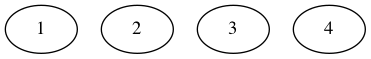

PW: 2


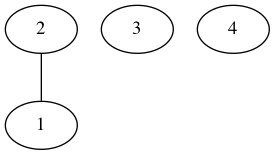

PW: 3


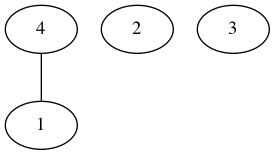

PW: 4


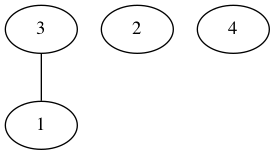

PW: 5


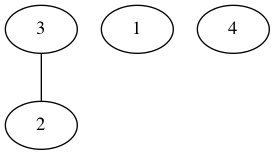

PW: 6


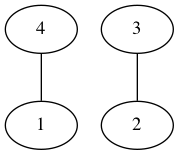

PW: 7


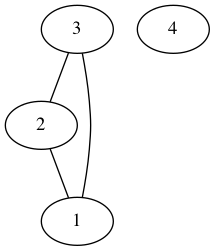

PW: 8


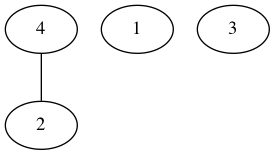

PW: 9


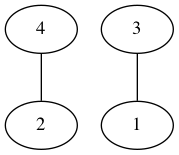

PW: 10


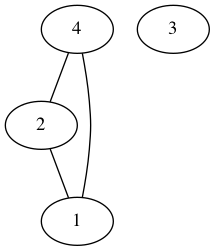

PW: 11


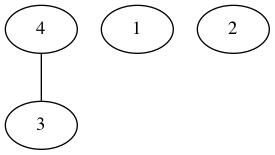

PW: 12


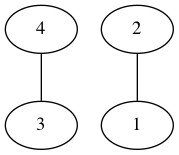

PW: 13


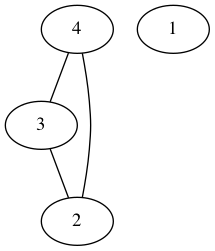

PW: 14


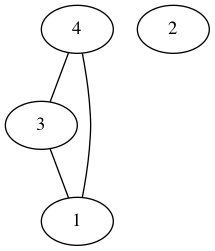

PW: 15


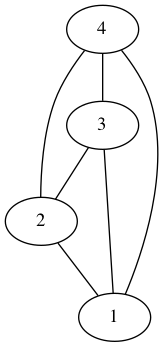

In [6]:
for i in range(1, len(partitions['pw_objs'])+1):
    print("PW:", i)
    display(draw(PWEVisualization.graphviz_from_meta_data(pw_slicer(partitions['pw_rel_dfs'], None, [i])[0], partitions['meta_data']['graphviz'])))

### Named to Un-Named

Above we saw that for n we get B<sub>n</sub> (Bell-Number) of PWs. If the objects were unnamed, we could group these PWs using a simple isomorphism based equivalence grouping function. The number of such disjoint groups would then be the number of integer partitions of n.

##### Encoding Isomorphism

In [7]:
%%clingo --donot-display_input -lci partition_eq_check --donot-run

% e(X,Y) :- e(Y,X). --> only if undirected
gnode1(X) :- tog1(X,_).
gnode1(X) :- tog1(_,X).
gnode1(X) :- ntog1(X,_).
gnode1(X) :- ntog1(_,X).

gnode2(X) :- tog2(X,_).
gnode2(X) :- tog2(_,X).
gnode2(X) :- ntog2(X,_).
gnode2(X) :- ntog2(_,X).

vmap(X,Y) ; not vmap(X,Y) :- gnode1(X), gnode2(Y).
:- vmap(X1,Y1), vmap(X2,Y2), tog1(X1,X2), not tog2(Y1,Y2).
:- vmap(X1,Y1), vmap(X2,Y2), not tog1(X1,X2), tog2(Y1,Y2).
:- vmap(X1,Y1), vmap(X2,Y2), ntog1(X1,X2), not ntog2(Y1,Y2).
:- vmap(X1,Y1), vmap(X2,Y2), not ntog1(X1,X2), ntog2(Y1,Y2).

:- gnode1(X), #count {Y: vmap(X,Y)} != 1.
:- gnode2(Y), #count {X: vmap(X,Y)} != 1.

#show.
% #show vmap/2.

##### Efficient Grouping Functions

In [8]:
def get_equivalent_sets(objs, match_func):
    
    sets = []
    curr_iter_set = list(range(len(objs)))
    while len(curr_iter_set) > 0:
        next_iter_set = []
        seed = curr_iter_set[0]
        curr_set = {objs[seed]}
        for c in curr_iter_set[1:]:
            if match_func(objs[seed], objs[c]):
                curr_set.add(objs[c])
            else:
                next_iter_set.append(c)
        sets.append(curr_set)
        curr_iter_set = next_iter_set
    return sets

def are_equivalent_patterns(pw1, pw2, eq_check_encoding=partition_eq_check):
    
    def get_edge_facts(pw, edge_rel_idx):
        pw_objs = [pw]
        _,_,pw_objs = rel_slicer(None, None, pw_objs, rels_to_use=['tog_2', 'ntog_2'])
        _, pw_objs, _ = rel_name_remapper(None, pw_objs, None, rel_name_map={'tog_2': 'tog{}_2'.format(str(edge_rel_idx)),
                                                                             'ntog_2': 'ntog{}_2'.format(str(edge_rel_idx))})
        return PWEExport.export_as_asp_facts(pw_objs, include_pw_ids=False)
    
    pw1_edge_facts = get_edge_facts(pw1, 1)
    pw2_edge_facts = get_edge_facts(pw2, 2)
    # print(pw1_edge_facts, pw2_edge_facts)
    asp_out, _ = run_clingo(eq_check_encoding.split('\n')+pw1_edge_facts+pw2_edge_facts, num_solutions=1)
    # print(asp_out)
    _,_,eq_check_pws = load_worlds(asp_out, silent=True)
    
    return len(eq_check_pws) >= 1

With those in place, we can find the disjoint sets of partitions, each of which are equivalent within themselves modulo renaming:

In [9]:
sets = get_equivalent_sets(partitions['pw_objs'], are_equivalent_patterns)

In [10]:
for s in sets:
    print({pw.pw_id for pw in s})

{1}
{2, 3, 4, 5, 8, 11}
{9, 12, 6}
{10, 13, 14, 7}
{15}


As we can see, we found I<sub>n</sub> sets. We can see these sets below and verify the validity of the groupings ourselves:

------------------------------------------------------------
Set: 0


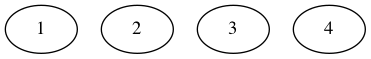

------------------------------------------------------------
------------------------------------------------------------
Set: 1


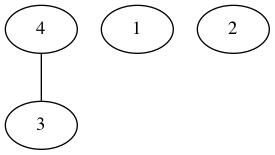

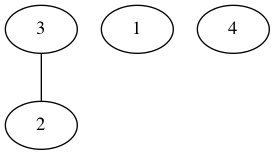

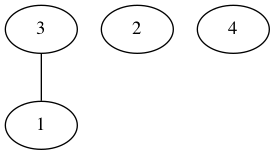

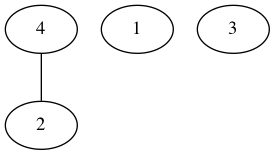

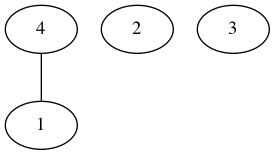

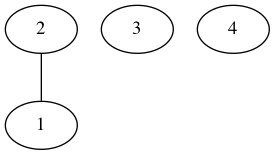

------------------------------------------------------------
------------------------------------------------------------
Set: 2


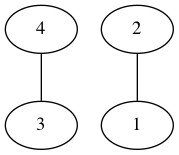

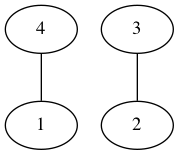

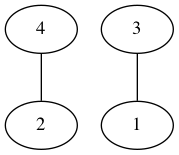

------------------------------------------------------------
------------------------------------------------------------
Set: 3


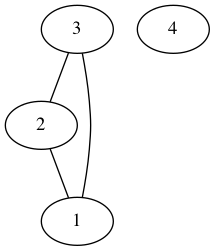

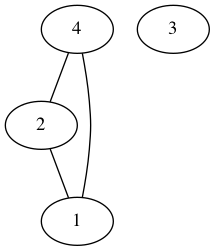

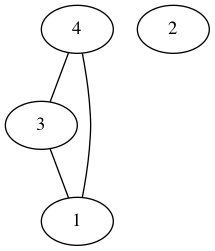

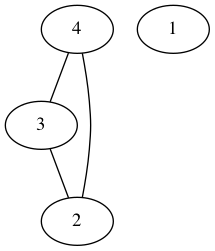

------------------------------------------------------------
------------------------------------------------------------
Set: 4


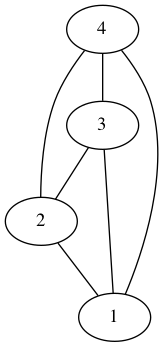

------------------------------------------------------------


In [11]:
for i, s in enumerate(sets):
    print('-'*60)
    print("Set:", i)
    for pw in s:
        display(draw(PWEVisualization.graphviz_from_meta_data(pw_slicer(partitions['pw_rel_dfs'], None, [pw.pw_id])[0], 
                                                              partitions['meta_data']['graphviz'])))
    print('-'*60)

##### As discussed earlier, the number of such sets is the number of integer partitions of n, in this case that is:

In [12]:
# The number of integer partitions of n:
len(sets)

5